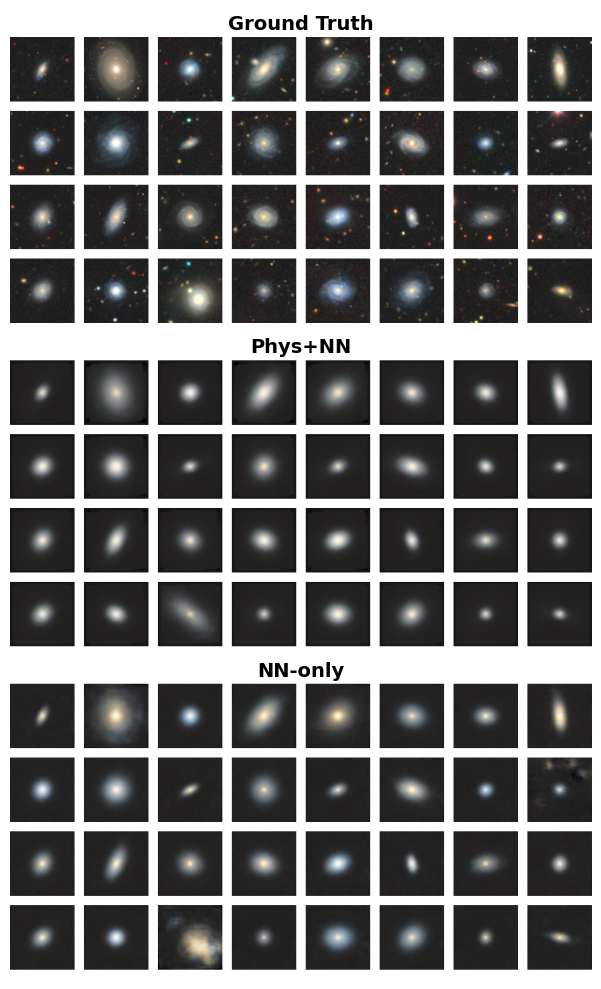

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot setup
fig, ax = plt.subplots(figsize=(12, 10))
ax.axis('off')

assembled_image = []
label_positions = []
label_names = list(recons.keys())
margin = 10  # space between image rows and blocks
label_height = 30  # height reserved for label
offset = 0

for key in label_names:
    # Add label space (just blank rows for now)
    label_img = np.ones((label_height, img_w * W + margin * (W - 1), 3))
    assembled_image.append(label_img)
    label_positions.append(offset + label_height // 2)

    # Assemble 4x8 image grid
    c = 0
    grid_row = []
    for i in range(H):
        row = []
        for j in range(W):
            img = recons[key][c]
            img_np = img.permute(1, 2, 0).numpy()
            row.append(img_np)
            if j < W - 1:
                row.append(np.ones((img_h, margin, 3)))
            c += 1
        grid_row.append(np.concatenate(row, axis=1))
        if i < H - 1:
            grid_row.append(np.ones((margin, img_w * W + margin * (W - 1), 3)))

    block = np.concatenate(grid_row, axis=0)
    assembled_image.append(block)

    # Add spacing below block
    assembled_image.append(np.ones((margin, block.shape[1], 3)))
    offset += label_height + block.shape[0] + margin

# Combine all image blocks
final_image = np.concatenate(assembled_image, axis=0)

# Display final image
ax.imshow(final_image)
x_center = final_image.shape[1] // 2
for i, label in enumerate(label_names):
    y = label_positions[i]
    ax.text(x_center, y, label, ha='center', va='center', fontsize=14, color='black', weight='bold')

plt.tight_layout()
plt.show()
# plt.imsave("galaxy_recon_labeled_above.png", final_image)
